# Color Threshold, Blue Screen

### Import resources

In [2]:
import numpy as np # for operating on the image
import matplotlib.pyplot as plt # for plotting
import cv2 # for doing image operations

### Read in and display the image

In [3]:
# Read in the image
image = cv2.imread('images\pizza_bluescreen.jpg')

# Print out the type of image data and its dimensions
# useful before operating on the image to find about the different features on the image
print(f'This image is: {type(image)} with dimensions: {image.shape}')

This image is: <class 'numpy.ndarray'> with dimensions: (514, 816, 3)


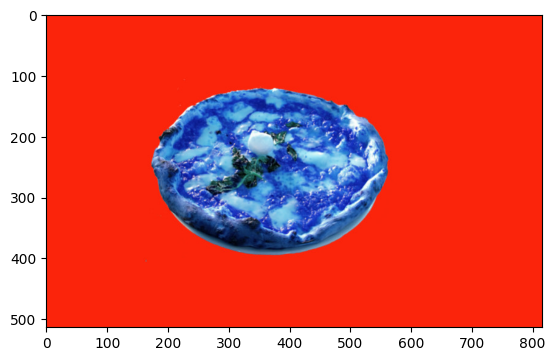

In [4]:
%matplotlib inline

# Display the image
plt.imshow(image)

# but image will look weird as opencv reads image as BGR i.e. blue, green, red and not RGB
# so we need to conver it into RGB format from BGR format

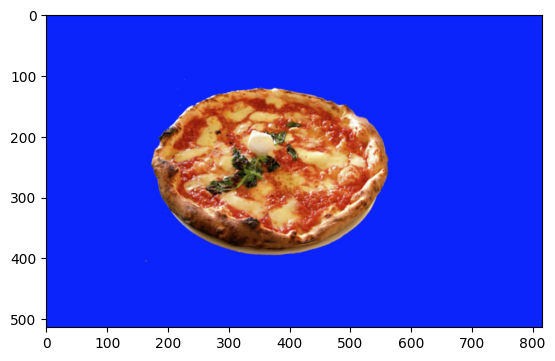

In [5]:
# Make a copy of the image
# always a good practice to make a copy of the image you are working with
# so any transformation you apply to the copy will not effect the original image
# so to undo a step or try something new
image_copy = np.copy(image)

# Change color to RGB (from BGR)
image_copy = cv2.cvtColor(image_copy, cv2.COLOR_BGR2RGB)

# Display the image
plt.imshow(image_copy)

### Define the color threshold

In [10]:
# Define our color selection boundaries in RGB values
# anything beween these values will be marked as change
# this is based on estimation
# if these are not what we want we need to change these values using hit and trial
lower_blue = np.array([0,0,220])
upper_blue = np.array([50,70,255])

### Create a mask

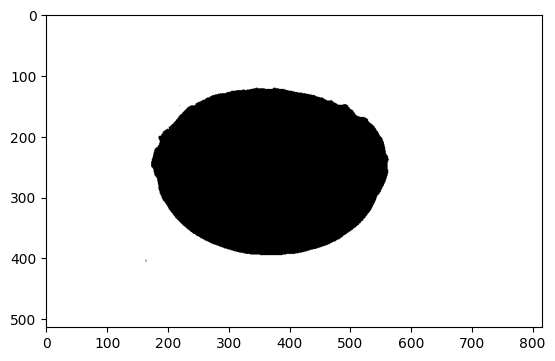

In [12]:
# Define the masked area
# mask is common method to select any area and do something with that area

mask = cv2.inRange(image_copy, lower_blue, upper_blue)
# this will allow to display only those pixels that ar under the lower and upper threshold values
# if pixels doesn't fall under this category, they will be marked as black

# Visualize the mask
plt.imshow(mask, cmap = 'grey')

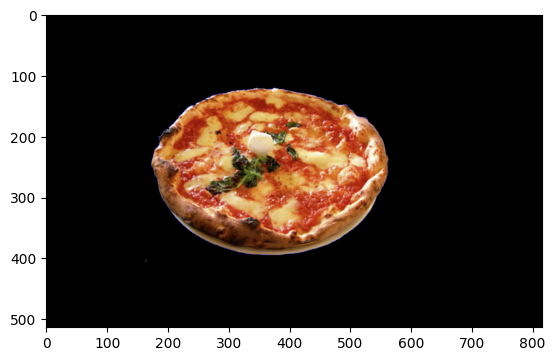

In [13]:
# Mask the image to let the pizza show through
# first we will create a copy of the masked image we just created just in case if we need to change the mask later
masked_image = np.copy(image_copy)

# To select the blue screen area
# asking the part of the image that overlaps with the mask or white region
# we will create mask by selecting the area of the image that is not black
masked_image[mask != 0] = [0, 0, 0]

# Display it!
plt.imshow(masked_image)

### Mask and add a background image

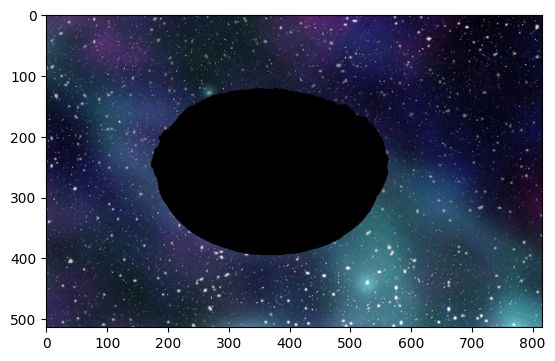

In [16]:
# Load in a background image, and convert it to RGB
background_image = cv2.imread('images\space_background.jpg')
background_image = cv2.cvtColor(background_image, cv2.COLOR_BGR2RGB)

# Crop it to the right size(514x816)
crop_background = background_image[0:514, 0:816]

# Mask the cropped background so that the pizza area is blocked
# in this we want background to show through and not the pizza area
crop_background[mask == 0] = [0, 0, 0]

# Display the background
plt.imshow(crop_background)

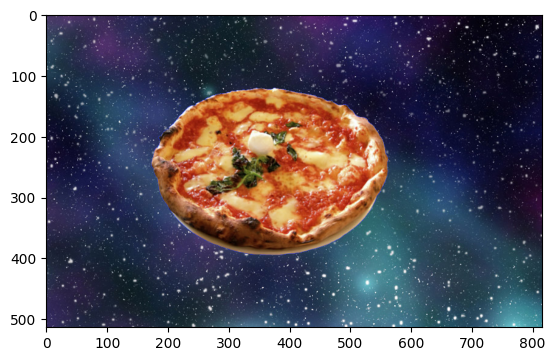

In [17]:
# Add the two images together to create a complete image
completed_image = crop_background + masked_image 

plt.imshow(completed_image)